In [1]:
import numpy as np
import pandas as pd
import re,unicodedata
import os
import tensorflow as tf
%matplotlib inline

#### Lectura de datos

In [2]:
ruta = 'datos/opiniones/'
l = os.listdir(ruta)

In [3]:
l

['Opinión Diplomado Ciencia de Datos UNAM FES Acatlán G2M4 (Responses).xlsx',
 'Opinión Diplomado Ciencia de Datos UNAM FES Acatlán G3M5  (Responses).xlsx',
 'Opinión Diplomado CDD UNAM FES Acatlán G2M5 (Responses).xlsx',
 'Opinión Diplomado Ciencia de Datos UNAM FES Acatlán M1G6 (Responses).xlsx',
 'Opinión Diplomado CDD UNAM FES Acatlán G3M4 (Responses).xlsx',
 'Opinión Diplomado Ciencia de Datos UNAM FES Acatlán M2G4 (Responses).xlsx',
 'Opinión Diplomado Ciencia de Datos UNAM FES Acatlán M2G5 (Responses).xlsx',
 'Opinión Diplomado Ciencia de Datos UNAM FES Acatlán M3G4 (Responses).xlsx',
 'Opinión Intermedia Diplomado CDD UNAM FES Acatlán G3M4  (Responses).xlsx',
 'Opinión Diplomado Ciencia de Datos UNAM FES Acatlán M1G5 (Responses).xlsx',
 'Opinión Diplomado Ciencia de Datos UNAM FES Acatlán G4M1 (Responses).xlsx']

In [4]:
len(l)

11

In [5]:
df = pd.concat(map(lambda x:pd.read_excel(os.path.join(ruta,x)).assign(grupo=x),l)).sample(frac=1).reset_index(drop=True)

In [6]:
df.shape

(294, 10)

In [7]:
df.sample(2)

,Timestamp,¿Cómo calificas la calidad de los contenidos del curso?,"¿Cómo calificas la calidad de los materiales(apuntes, códigos, datos, etc.?",¿Cómo calificas el nivel de dificultad de los contenidos del curso?,¿Cómo calificas la calidad del ponente?,¿Cómo calificas el nivel de dificultad de la evaluación?,¿Cómo calificas la calidad de las prácticas en clase?,"En general, ¿Cuántas estrellas darías al módulo?","Por favor, emite tu libre opinión sobre el módulo en general (instructor, material, contenido, etc.)",grupo
19,2021-02-19 11:51:11.064,4,4,5,5,5,4,5,Requerir nivel intermedio de Python como requi...,Opinión Diplomado Ciencia de Datos UNAM FES Ac...
262,2021-02-19 13:12:20.217,4,4,3,5,4,4,4,"Los puntos tocados en este módulo son buenos, ...",Opinión Diplomado Ciencia de Datos UNAM FES Ac...


In [8]:
#Renombramos los nombres de las columnas por nombres simples
d = dict(zip(df.columns.tolist(),range(len(df.columns.tolist()))))
df.rename(columns=d,inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,2021-02-19 11:47:45.861,5,5,3,5,3,5,5,Excelente,Opinión Diplomado Ciencia de Datos UNAM FES Ac...
1,2021-02-19 11:46:58.468,3,3,4,2,3,3,3,Fueron demasiados temas para el módulo. Además...,Opinión Diplomado Ciencia de Datos UNAM FES Ac...
2,2021-02-19 12:34:23.821,5,5,5,5,5,5,5,Excelente calidad,Opinión Diplomado Ciencia de Datos UNAM FES Ac...
3,2020-11-30 19:57:20.157,5,5,5,5,4,5,5,Excelente manejo de la clase y conocimientos s...,Opinión Diplomado CDD UNAM FES Acatlán G3M4 (R...
4,2021-02-20 09:13:48.310,5,5,3,5,4,5,5,"Modulo muy completo y el instructor excelente,...",Opinión Diplomado Ciencia de Datos UNAM FES Ac...


#### Quitamos acentos, homologamos minúsculas, quitamos caracteres innecesarios, quitamos stopwords

In [9]:
def limpiar_texto(text):
    res =  unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    res = re.sub("[^a-zA-Z0-9 ]"," ", res.decode("utf-8"), flags=re.UNICODE)
    res =  u' '.join(res.lower().split())
    return res

In [10]:
df[8] = df[8].map(limpiar_texto)

In [11]:
df[8]

0                                              excelente
1      fueron demasiados temas para el modulo ademas ...
2                                      excelente calidad
3      excelente manejo de la clase y conocimientos s...
4      modulo muy completo y el instructor excelente ...
                             ...                        
289    nunca funcionaban los notebooks y siempre hubo...
290    me hubiera gustado que hubiera mas interpretac...
291    el modulo permitio integrar todos los contenid...
292    el curso es muy bueno pero la dificultad tanto...
293    el modulo me gusto creo que carla plasmo muy b...
Name: 8, Length: 294, dtype: object

In [12]:
from nltk.corpus import stopwords

sw = stopwords.words('spanish')
sw = [limpiar_texto(w) for w in sw]
df[8] = df[8].map(lambda x:" ".join([v for v in x.split(' ') if v not in sw]))
df.head()

,0,1,2,3,4,5,6,7,8,9
0,2021-02-19 11:47:45.861,5,5,3,5,3,5,5,excelente,Opinión Diplomado Ciencia de Datos UNAM FES Ac...
1,2021-02-19 11:46:58.468,3,3,4,2,3,3,3,demasiados temas modulo ademas considero falto...,Opinión Diplomado Ciencia de Datos UNAM FES Ac...
2,2021-02-19 12:34:23.821,5,5,5,5,5,5,5,excelente calidad,Opinión Diplomado Ciencia de Datos UNAM FES Ac...
3,2020-11-30 19:57:20.157,5,5,5,5,4,5,5,excelente manejo clase conocimientos solidos m...,Opinión Diplomado CDD UNAM FES Acatlán G3M4 (R...
4,2021-02-20 09:13:48.310,5,5,3,5,4,5,5,modulo completo instructor excelente dispuesta...,Opinión Diplomado Ciencia de Datos UNAM FES Ac...


#### Tokenizamos el texto

In [13]:
tk = tf.keras.preprocessing.text.Tokenizer(num_words=500, lower=True,split=' ')

In [14]:
tk.fit_on_texts(df[8].values)

In [15]:
tam_vocab = len(tk.word_index)
print(tam_vocab)

1691


In [16]:
X = tk.texts_to_sequences(df[8].values)
X = tf.keras.preprocessing.sequence.pad_sequences(X)

In [17]:
print(df[8].values[-1])
print(X[-1])
print(df[8].values[11])
print(X[11])

modulo gusto creo carla plasmo bien conceptosy razonable hora evaluar detuvo feedback escucho areas oportunidad unico gustaba volumen microfono pues bajo complico programado python tardaba costaban ciertas cosas creo logre aprender bastante bien carla siempre dispuesta ayudarme resolver dudas ensenar contenido excelente codigos hacia pesar tener preparado aunque lenta clase perdio tiempo parecio bueno siento aprendi mejor
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   1  43  16  94   7 222 148 317 412 137  78
 149  64  32  16  97  34   7  94  38 164  54  21 166   8   5  5

#### Variable objetivo

In [18]:
df[7].describe()

count    294.000000
mean       4.506803
std        0.861553
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: 7, dtype: float64

In [19]:
df[[7,9]].groupby(9).mean()

,7
9,
Opinión Diplomado CDD UNAM FES Acatlán G2M5 (Responses).xlsx,4.827586
Opinión Diplomado CDD UNAM FES Acatlán G3M4 (Responses).xlsx,3.437500
Opinión Diplomado Ciencia de Datos UNAM FES Acatlán G2M4 (Responses).xlsx,4.625000
Opinión Diplomado Ciencia de Datos UNAM FES Acatlán G3M5 (Responses).xlsx,5.000000
Opinión Diplomado Ciencia de Datos UNAM FES Acatlán G4M1 (Responses).xlsx,4.555556
Opinión Diplomado Ciencia de Datos UNAM FES Acatlán M1G5 (Responses).xlsx,4.653846
Opinión Diplomado Ciencia de Datos UNAM FES Acatlán M1G6 (Responses).xlsx,4.648649
Opinión Diplomado Ciencia de Datos UNAM FES Acatlán M2G4 (Responses).xlsx,4.555556
Opinión Diplomado Ciencia de Datos UNAM FES Acatlán M2G5 (Responses).xlsx,4.272727


In [20]:
y = np.array((df[7]>=4).astype(int)) #Positivo para puntuaciones 4 y 5

In [21]:
y.mean()

0.8979591836734694

#### Construcción del modelo

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
Xt,Xv,yt,yv = train_test_split(X,y,train_size=0.7)
Xt.shape,Xv.shape

((205, 155), (89, 155))

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [27]:
tam_vector_embed = 24
model = Sequential()
model.add(Embedding(tam_vocab, tam_vector_embed,     
                                     input_length=Xt.shape[1]) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=[tf.keras.metrics.AUC()])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 155, 24)           40584     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 155, 24)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               50000     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 90,685
Trainable params: 90,685
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
historia = model.fit(X,y,
                  validation_split=0.3, 
                     epochs=100, 
                     batch_size=25,
                     shuffle=True)

Epoch 1/100
9/9 [==============================] - 1s 138ms/step - loss: 0.6877 - auc: 0.5436 - val_loss: 0.6799 - val_auc: 0.5000
Epoch 2/100
9/9 [==============================] - 1s 99ms/step - loss: 0.6763 - auc: 0.5477 - val_loss: 0.6663 - val_auc: 0.6004
Epoch 3/100
9/9 [==============================] - 1s 98ms/step - loss: 0.6602 - auc: 0.6910 - val_loss: 0.6422 - val_auc: 0.7108
Epoch 4/100
9/9 [==============================] - 1s 97ms/step - loss: 0.6296 - auc: 0.6552 - val_loss: 0.5794 - val_auc: 0.7711
Epoch 5/100
9/9 [==============================] - 1s 98ms/step - loss: 0.5023 - auc: 0.5169 - val_loss: 0.2413 - val_auc: 0.7189
Epoch 6/100
9/9 [==============================] - 1s 105ms/step - loss: 0.3681 - auc: 0.5241 - val_loss: 0.2418 - val_auc: 0.7349
Epoch 7/100
9/9 [==============================] - 1s 97ms/step - loss: 0.3491 - auc: 0.6093 - val_loss: 0.2409 - val_auc: 0.7289
Epoch 8/100
9/9 [==============================] - 1s 95ms/step - loss: 0.3681 - auc: 0.

9/9 [==============================] - 1s 85ms/step - loss: 0.3007 - auc: 0.7996 - val_loss: 0.2219 - val_auc: 0.8233
Epoch 64/100
9/9 [==============================] - 1s 86ms/step - loss: 0.3158 - auc: 0.7652 - val_loss: 0.2138 - val_auc: 0.8293
Epoch 65/100
9/9 [==============================] - 1s 86ms/step - loss: 0.2971 - auc: 0.7998 - val_loss: 0.2143 - val_auc: 0.8133
Epoch 66/100
9/9 [==============================] - 1s 85ms/step - loss: 0.2966 - auc: 0.8085 - val_loss: 0.2177 - val_auc: 0.8193
Epoch 67/100
9/9 [==============================] - 1s 85ms/step - loss: 0.3119 - auc: 0.7373 - val_loss: 0.2127 - val_auc: 0.8122
Epoch 68/100
9/9 [==============================] - 1s 86ms/step - loss: 0.2948 - auc: 0.8195 - val_loss: 0.2110 - val_auc: 0.8122
Epoch 69/100
9/9 [==============================] - 1s 84ms/step - loss: 0.2956 - auc: 0.8155 - val_loss: 0.2109 - val_auc: 0.8313
Epoch 70/100
9/9 [==============================] - 1s 85ms/step - loss: 0.2977 - auc: 0.8240 - 

In [29]:
import matplotlib.pyplot as plt

hist = historia.history
x_arr = np.arange(len(hist['loss']))+1

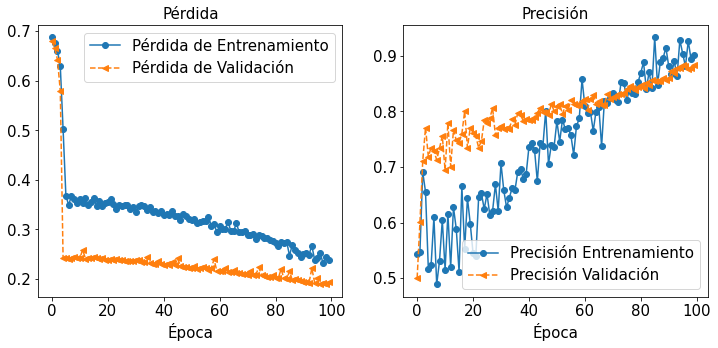

In [30]:

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
ax.plot(hist['loss'],'-o',label='Pérdida de Entrenamiento')
ax.plot(hist['val_loss'],'--<',label='Pérdida de Validación')
ax.set_title('Pérdida',size=15)
ax.set_xlabel('Época',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1,2,2)
ax.plot(hist['auc'],'-o',label='Precisión Entrenamiento')
ax.plot(hist['val_auc'],'--<',label='Precisión Validación')
ax.set_title('Precisión',size=15)
ax.set_xlabel('Época',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
ax.legend(fontsize=15)
plt.show()

#### Prueba del modelo

In [31]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [32]:
yt_pred = model.predict(Xt)
yt_pred = np.array([int(x[0]>=0.5) for x in yt_pred])
yv_pred = model.predict(Xv)
yv_pred = np.array([int(x[0]>=0.5) for x in yv_pred])

In [33]:
yt_score =np.array([x[0] for x in model.predict(Xt)])
yv_score =np.array([x[0] for x in model.predict(Xv)])

In [34]:
accuracy_score(y_true=yt,y_pred=yt_pred),accuracy_score(y_true=yv,y_pred=yv_pred)

(0.9219512195121952, 0.9101123595505618)

In [35]:
roc_auc_score(y_true=yt,y_score=yt_score),roc_auc_score(y_true=yv,y_score=yv_score)

(0.951564828614009, 0.8179012345679012)

In [36]:
confusion_matrix(y_true=yt,y_pred=yt_pred),confusion_matrix(y_true=yv,y_pred=yv_pred)

(array([[  6,  16],
        [  0, 183]]),
 array([[ 0,  8],
        [ 0, 81]]))

In [44]:
tk.sequences_to_texts(X)[4]

'modulo completo instructor excelente dispuesta resolver cualquier duda maneja bien temas'

In [45]:
y[4]

1

In [39]:
y

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1])